In [1]:
#Read data
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

In [2]:
#in practice do not supress these warnings, they carry important information about the status of your model
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning, HessianInversionWarning, ConvergenceWarning
warnings.filterwarnings('ignore', category=ValueWarning)
warnings.filterwarnings('ignore', category=HessianInversionWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [11]:
tickerSymbol = 'TSLA'
data = yf.Ticker(tickerSymbol)

In [12]:
prices = data.history(start='2015-02-01', end='2022-04-29').Close
returns = 100*prices.pct_change().dropna()

Text(0, 0.5, 'Prices')

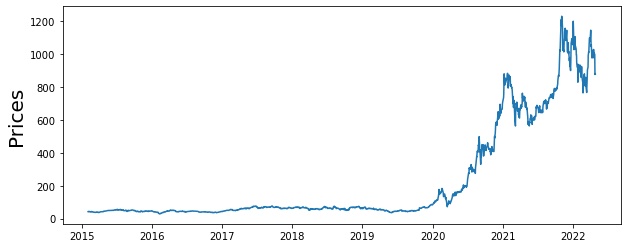

In [13]:
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel('Prices', fontsize=20)

Text(0, 0.5, 'Return')

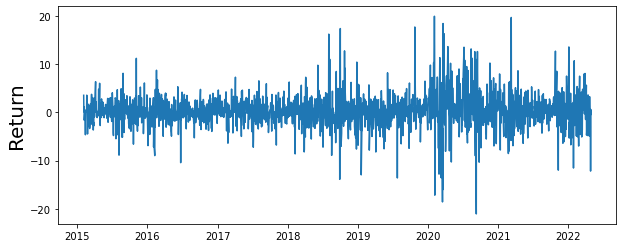

In [14]:
#taking return to covert this to stationary
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Return', fontsize=20)

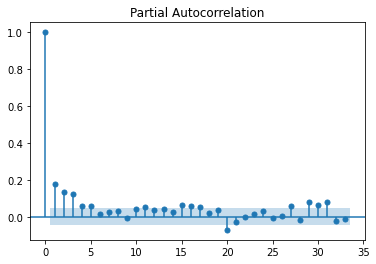

In [15]:
plot_pacf(returns**2)
plt.show()

In [8]:
#Fit GARCH(3,0) model

In [28]:
model = arch_model(returns, p=3, q=0)

In [29]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 5529.112239103872
Iteration:      2,   Func. Count:     16,   Neg. LLF: 7708.021791125553
Iteration:      3,   Func. Count:     24,   Neg. LLF: 5646.446038269555
Iteration:      4,   Func. Count:     31,   Neg. LLF: 5224.17090072162
Iteration:      5,   Func. Count:     38,   Neg. LLF: 7841.140637425974
Iteration:      6,   Func. Count:     45,   Neg. LLF: 4821.155131031794
Iteration:      7,   Func. Count:     52,   Neg. LLF: 4790.01738049364
Iteration:      8,   Func. Count:     59,   Neg. LLF: 4765.0003045780595
Iteration:      9,   Func. Count:     65,   Neg. LLF: 4764.929673899973
Iteration:     10,   Func. Count:     71,   Neg. LLF: 4764.924291628715
Iteration:     11,   Func. Count:     77,   Neg. LLF: 4764.923830237674
Iteration:     12,   Func. Count:     83,   Neg. LLF: 4764.923826435683
Iteration:     13,   Func. Count:     88,   Neg. LLF: 4764.923826435552
Optimization terminated successfully    (Exit mode 0)
           

In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4764.92
Distribution:                  Normal   AIC:                           9539.85
Method:            Maximum Likelihood   BIC:                           9567.39
                                        No. Observations:                 1823
Date:                Sat, Apr 30 2022   Df Residuals:                     1822
Time:                        19:57:34   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2244  7.799e-02      2.877  4.016e-03 [7.152e-02,  0.377]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          6.9743      0.761      9.168  4.825e-20   [  5.483,  8.465]
alpha[1]       0.1057  3.507e-02      3.014  2.580e-03 [3.696e-02,  0.174]
alpha[2]       0.1752  5.574e-02      3.142  1.675e-03 [6.591e-02,  0.284]
alpha[3]       0.1720  5.287e-02      3.252  1.144e-03 [6.834e-02,  0.276]
==========================================================================

Covariance estimator: robust
"""

In [33]:
#Rolling Predictions

In [34]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

C:\Users\Amrita\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\Amrita\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\Amrita\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this me

In [35]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

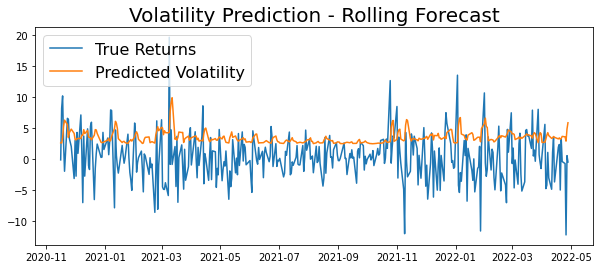

In [36]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [37]:
train = returns
model = arch_model(train, p=3, q=0)
model_fit = model.fit(disp='off')

In [38]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

C:\Users\Amrita\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

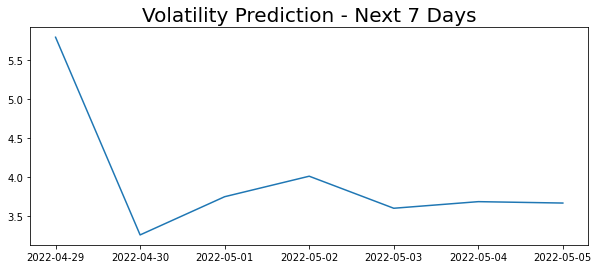

In [39]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)